In [1]:
# Imports
import numpy as np
import pandas as pd
import zipfile

import matplotlib.pyplot as plt
import mercury as mr

import re
from collections import Counter

from string import punctuation as punct
import warnings
warnings.filterwarnings('ignore')

In [2]:
#unzipping
with zipfile.ZipFile('df-job-al.zip', 'r') as zip_ref:
    zip_ref.extractall()

In [3]:
df = pd.read_csv("gsearch_jobs.csv")
df = df.drop(columns=["Unnamed: 0", "index"])

# Format lists
remove_punct = lambda x: x.translate(str.maketrans('', '', punct)).split()
df.extensions = df.extensions.apply(remove_punct)
df.description_tokens = df.description_tokens.apply(remove_punct)

In [4]:
# Data cleaning

In [5]:
#keywords
junior_keywords = ['junior', 'entry level', 'intern', 'apprentice','jr','I']
mid_keywords = ['mid-level', 'mid level', 'midlevel','mid', 'II','consultant', 'intermediate', 'experienced','associate','practitioner']
senior_keywords = ['senior', 'lead', 'principal', 'sr', 'III', 'IV', 'senior level','advanced','senior associate', 'expert']

In [6]:
# function to assign an offer to a category
def categorize_job(row):
    title = row['title'].lower()
    description = row['description'].lower()
    for keyword in junior_keywords:
        if keyword in title or keyword in description:
            return 'Junior'
    for keyword in mid_keywords:
        if keyword in title or keyword in description:
            return 'Mid'
    for keyword in senior_keywords:
        if keyword in title or keyword in description:
            return 'Senior'
    return 'unknown'

# add column 
df['category'] = df.apply(categorize_job, axis=1)

In [7]:
df = df.drop(df[df['category'] == 'unknown'].index)

In [8]:
keywords_programming = {
'sql', 'python', 'r', 'c', 'c#', 'javascript', 'js',  'java', 'scala', 'sas', 'matlab', 
'c++', 'perl', 'go', 'typescript', 'bash', 'html', 'css', 'php', 'powershell', 'rust', 
'kotlin', 'ruby',  'dart', 'assembly', 'swift', 'vba', 'lua', 'groovy', 'delphi', 'objective-c', 
'haskell', 'elixir', 'julia', 'clojure', 'solidity', 'lisp', 'f#', 'fortran', 'erlang', 'apl', 
'cobol', 'ocaml', 'crystal', 'javascript/typescript', 'golang', 'nosql', 'mongodb', 't-sql', 'no-sql',
'visual_basic', 'pascal', 'mongo',  'sass', 'vb.net', 'mssql'
}

keywords_libraries = {
'scikit-learn', 'jupyter', 'theano', 'openCV', 'spark', 'nltk', 'mlpack', 'chainer', 'fann', 'shogun', 
'dlib', 'mxnet', 'node.js', 'vue', 'vue.js', 'keras', 'ember.js'
}

keywords_analyst_tools = {
'excel', 'tableau',  'word', 'powerpoint', 'looker', 'powerbi', 'outlook', 'azure', 'jira', 'twilio',  'snowflake', 
'shell', 'linux', 'sas', 'sharepoint', 'mysql', 'visio', 'git', 'mssql', 'powerpoints', 'postgresql', 'spreadsheets',
'seaborn', 'pandas', 'gdpr', 'spreadsheet', 'alteryx', 'github', 'postgres', 'ssis', 'numpy', 'power_bi', 'spss', 'ssrs', 
'microstrategy',  'cognos', 'dax', 'matplotlib', 'dplyr', 'tidyr', 'ggplot2', 'plotly', 'esquisse', 'rshiny', 'mlr',
'docker', 'linux', 'jira',  'hadoop', 'airflow', 'redis', 'graphql', 'sap', 'tensorflow', 'node', 'asp.net', 'unix',
'jquery', 'pyspark', 'pytorch', 'gitlab', 'selenium', 'splunk', 'bitbucket', 'qlik', 'terminal', 'atlassian', 'unix/linux',
'linux/unix', 'ubuntu', 'nuix', 'datarobot','aws', 'azure', 'snowflake', 'redshift', 'bigquery', 'aurora'
}

keywords = keywords_programming.union(keywords_libraries).union(keywords_analyst_tools)

In [9]:
#Drop rows with null descriptions
jobs_all = df.dropna(subset=['description']).reset_index()

In [10]:
keyword_counts = Counter()
for description in jobs_all['description']:
    words = description.lower().split()
    keyword_counts.update(set(words).intersection(keywords))

In [11]:
# sort the keywords by frequency in descending order
sorted_counts = keyword_counts.most_common()

In [12]:
# extract the 10 most common keywords
top_keywords = sorted_counts[:10]

In [13]:
skills = []

for val in df.description_tokens.values:
    skills.extend(val)
skills, counts = np.unique(skills, return_counts=True)
skill_count = sorted(zip(list(skills), list(counts)), key=lambda x: -x[1])
skills = list(map(lambda x: x[0], skill_count))
counts = list(map(lambda x: x[1], skill_count))
salaries = []
for skill in skills: 
    salaries.append(df[df.description_tokens.apply(lambda x: skill in x)].salary_standardized.fillna(0).mean())
skills_df = pd.DataFrame({"skill": list(skills), "number_of_postings": counts, "avg_salary": map(round, salaries)})
skills_df = skills_df.sort_values("avg_salary", ascending=False)

In [14]:
#percent_missing = df.isna().sum() * 100 / len(df)
#print(f"Percentage of missing data:\n{percent_missing}")

# Analytical Skills 📊
Nowadays, it is becoming increasingly difficult to find a first job as a data analyst. Therefore, we have prepared an analysis of the most useful skills to help you land your dream job. Here, you will find information on: 

## What you will finde here:

- Number of jobs depending on experience level
- What company is looking for the most employees
- Where company is looking for the most employees
- Where you can finde the most offert in internet
- What are the working hours
- How many offers have remote work
- Most needed skills
- Salaries for 10 most popular skills

##### WORNIN: If you unchecking all values from the MultiSelect widget charts will not show.

In [15]:
show_code = mr.Checkbox(label="Show code", value=False)

mercury.Checkbox

In [16]:
app = mr.App(title="JOB-Market",description="Hello Mercury", show_code=show_code.value)

mercury.App

In [17]:
lvl = mr.MultiSelect(value=['Junior','Mid','Senior'],choices=['Junior','Mid','Senior'], label="Choose youre level")


mercury.MultiSelect

In [18]:
df_lvl = df[df.category.isin(lvl.value)]

# Number of jobs for Junior, Mid, Senior

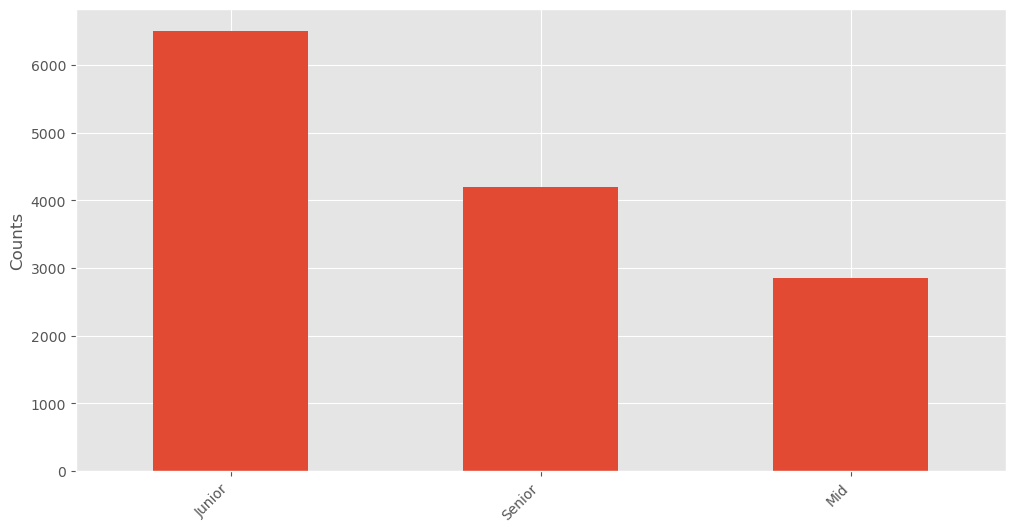

In [19]:
plt.figure(figsize=(12,6))
plt.style.use('ggplot')

level = df_lvl['category'].value_counts()
level.plot(kind='bar')

plt.title(mr.Md(f"# Number of jobs for {', '.join(lvl.value)}"))
plt.ylabel("Counts")
plt.xticks(rotation=45, ha="right")
plt.show()


# What company is looking for Junior, Mid, Senior employees

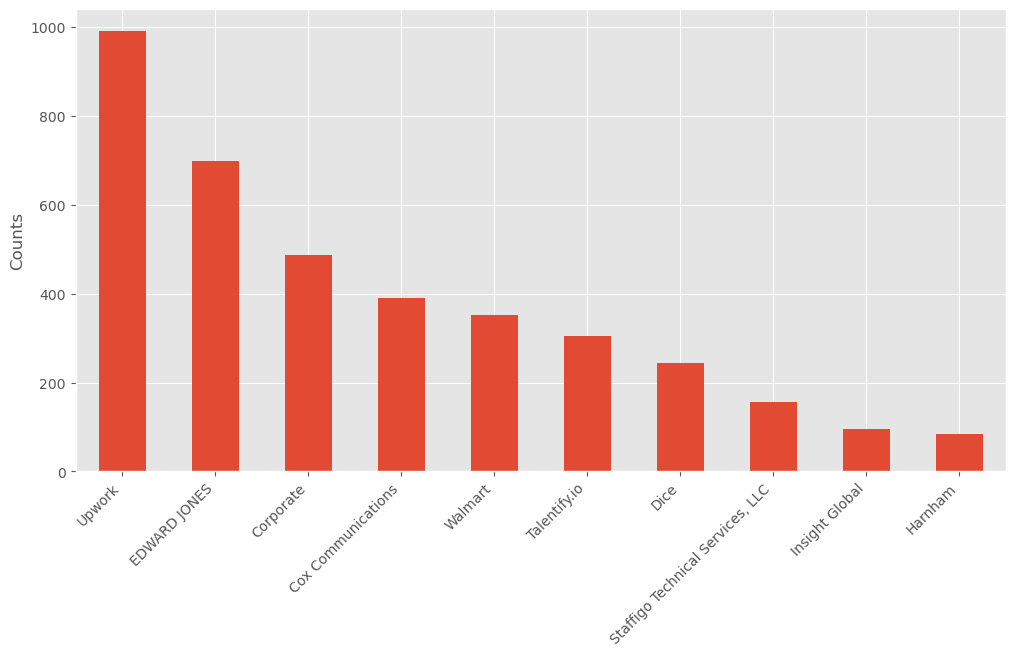

In [20]:
plt.figure(figsize=(12,6))
counts = df_lvl['company_name'].value_counts().nlargest(10).sort_values(ascending=False)
counts.plot(kind='bar')

plt.title(mr.Md(f"# What company is looking for {', '.join(lvl.value)} employees"))
plt.ylabel("Counts")
plt.xticks(rotation=45, ha="right")
plt.show()

## Where to look?

# Where you can finde the most offert for Junior, Mid, Senior

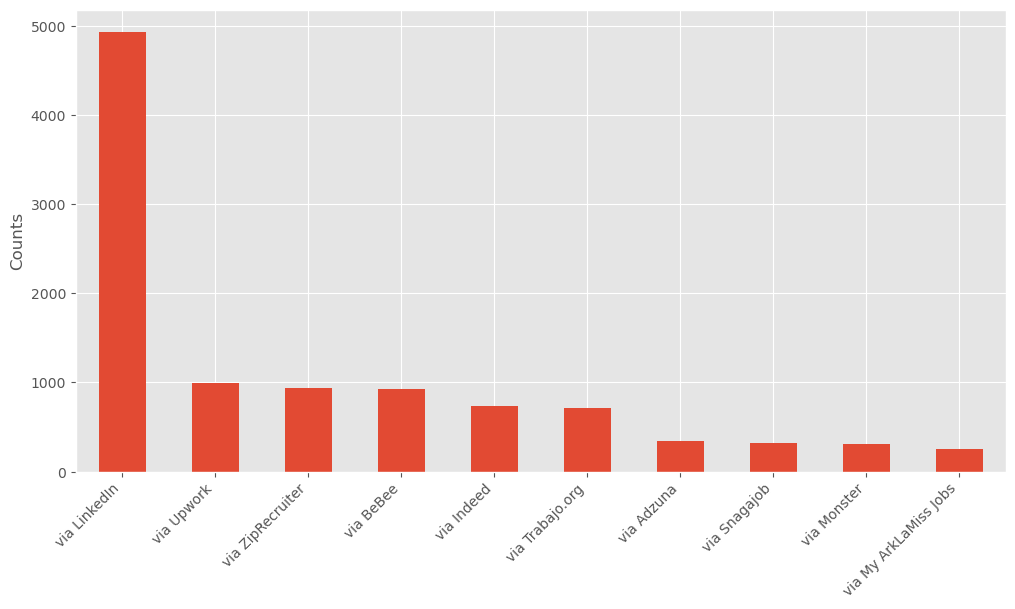

In [21]:
plt.figure(figsize=(12,6))
counts = df_lvl['via'].value_counts().nlargest(10).sort_values(ascending=False)
counts.plot(kind='bar')

plt.title(mr.Md(f"# Where you can finde the most offert for {', '.join(lvl.value)}"))
plt.ylabel("Counts")
plt.xticks(rotation=45, ha="right")
plt.show()

## Work type

# What are the working hours for  Junior, Mid, Senior

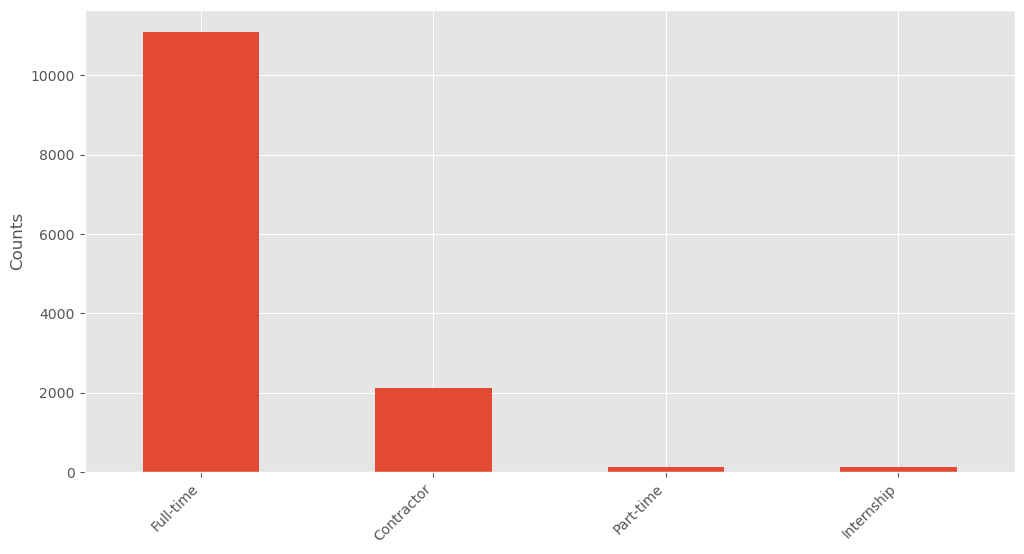

In [22]:
plt.figure(figsize=(12,6))
counts = df_lvl['schedule_type'].value_counts().nlargest(10).sort_values(ascending=False)
counts.plot(kind='bar')

plt.title(mr.Md(f"# What are the working hours for  {', '.join(lvl.value)}"))
plt.ylabel("Counts")
plt.xticks(rotation=45, ha="right")
plt.show()

# How many offers have remote work for  Junior, Mid, Senior

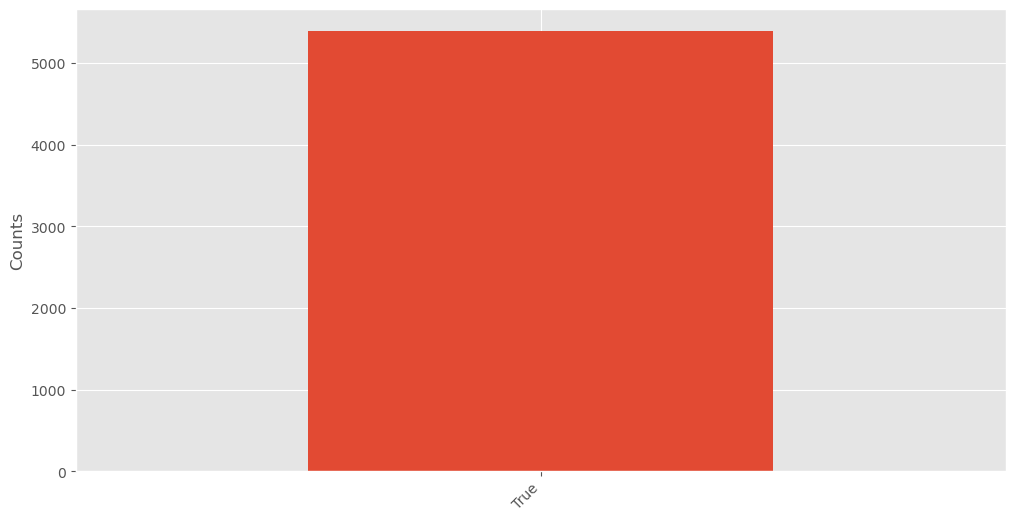

In [23]:
plt.figure(figsize=(12,6))
counts = df_lvl['work_from_home'].value_counts().nlargest(10).sort_values(ascending=False)
counts.plot(kind='bar')

plt.title(mr.Md(f"# How many offers have remote work for  {', '.join(lvl.value)}"))
plt.ylabel("Counts")
plt.xticks(rotation=45, ha="right")
plt.show()

In [24]:
top_3_companies = df_lvl['company_name'].value_counts().nlargest(3).index.tolist()

In [25]:
mr.Md(f"# About data for") 
mr.Md(f"### Where you can find the most offers for {', '.join(top_3_companies)}")
mr.Md(f"### More than 40% of job listings offer remote jobs. ")
mr.Md(f"### This dataset is about the USA market. ")
mr.Md(f"### There are exactly 15,963 job advertisements from the Internet in this dataset. ")
mr.Md(f"### We can assume that 80% of the salary information is missing due to most likely being negotiated.")

# About data for

### Where you can find the most offers for Upwork, EDWARD JONES, Corporate

### More than 40% of job listings offer remote jobs. 

### This dataset is about the USA market. 

### There are exactly 15,963 job advertisements from the Internet in this dataset. 

### We can assume that 80% of the salary information is missing due to most likely being negotiated.

## Skills & payments

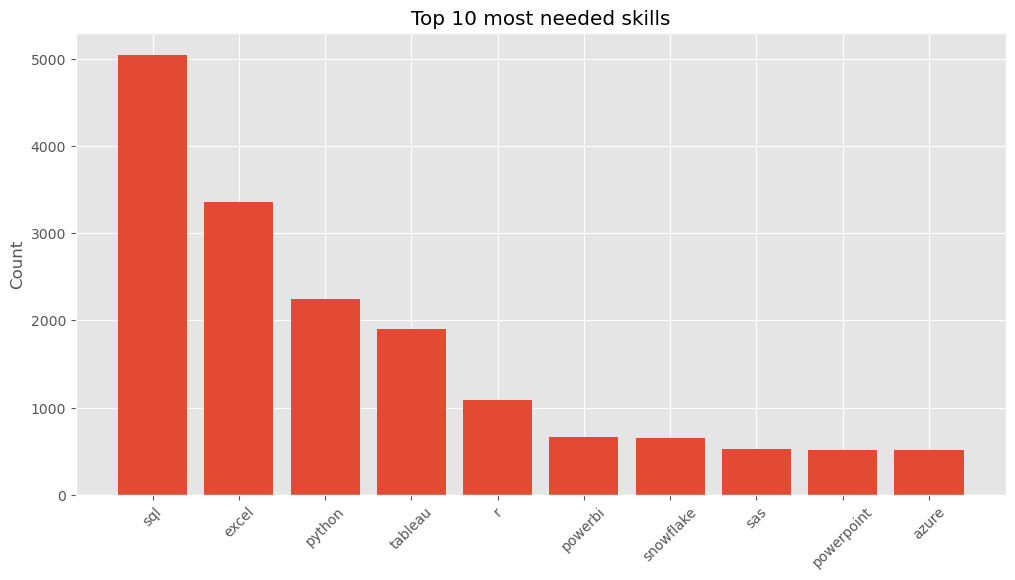

In [26]:
plt.figure(figsize=(12,6))
plt.bar(range(len(top_keywords)), [x[1] for x in top_keywords])
plt.xticks(range(len(top_keywords)), [x[0] for x in top_keywords], rotation=45)

plt.title('Top 10 most needed skills')
plt.ylabel('Count')
plt.show()

In [27]:
keyword = keywords_programming.union(keywords_libraries).union(keywords_analyst_tools)

In [28]:
sk_set = mr.MultiSelect(choices=keyword, label="Choose your skills",
                        value=['sql', 'python', 'r', 'snowflake','excel','powerbi','sas','azure','linux', 'tableau'])

mercury.MultiSelect

In [29]:
sk_df = skills_df[skills_df.skill.isin(sk_set.value)]

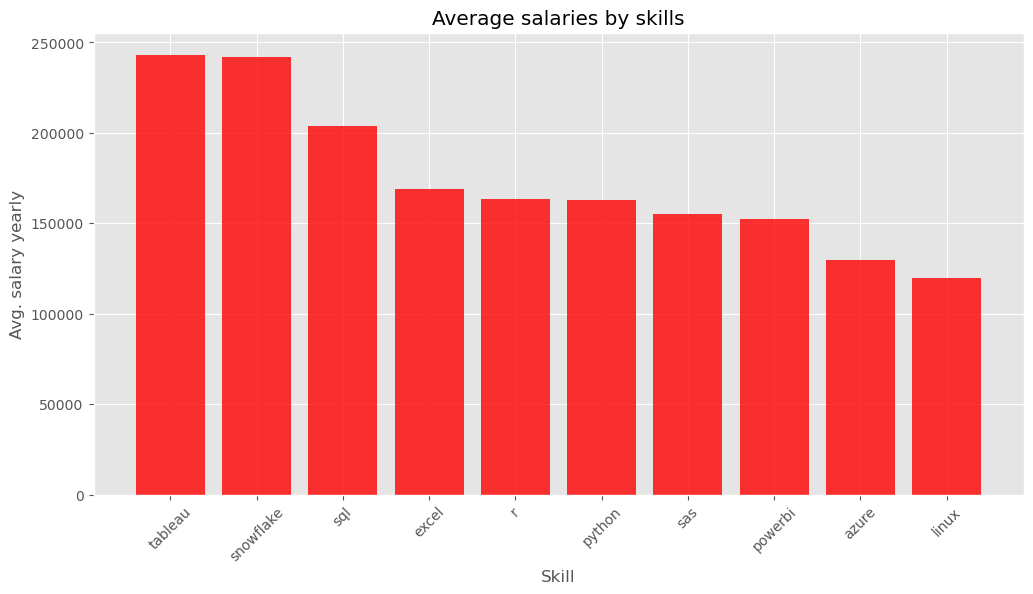

In [30]:
fig, ax = plt.subplots(figsize=(12,6))
ax.bar(sk_df['skill'], sk_df['avg_salary']*12, color='red', alpha=0.8)

ax.set_xlabel('Skill')
ax.set_ylabel('Avg. salary yearly')
ax.set_title('Average salaries by skills')
plt.xticks(rotation=45);

plt.show();